<a href="https://colab.research.google.com/github/whippyrock12-a11y/novaretail_proyect/blob/main/Project_NovaRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 7 - Explorando factores de comportamiento en NovaRetail+


NovaRetail+ es una plataforma de comercio electrónico en Latinoamérica con millones de usuarios.

Para el cierre de 2024, el equipo de **Crecimiento y retención** tiene como objetivo responder:

**¿Qué factores del comportamiento del cliente están más fuertemente asociados con el ingreso anual generado?**

> Este proyecto es un análisis **correlacional** (exploratorio).  
> **Correlación ≠ causalidad.**

## Sección 1 - Cargar y explorar el dataset

En esta sección validamos:
- que el dataset cargue correctamente
- tipos de datos
- valores faltantes / rangos generales

Antes de correlacionar, primero entendemos el “terreno”.

In [ ]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

### Cargar Dataset

In [ ]:
# Cargar el dataset y explorar datos
df = pd.read_csv('/datasets/novaretail_comportamiento_clientes_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  float64
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(5), int64(4), object(3)
memory usage: 1.4+ MB


#### Descripción del conjunto de datos

El dataset contiene las siguientes columnas:

- `id_cliente` — Identificador único del cliente.
- `edad` — Edad del cliente.
- `nivel_ingreso` — Ingreso anual estimado del cliente.
- `visitas_mes` — Número de visitas a la aplicación o sitio web durante el mes.
- `compras_mes` — Número de compras realizadas en el mes.
- `gasto_publicidad_dirigida` — Gasto en anuncios asignado al usuario.
- `satisfaccion` — Calificación de satisfacción del cliente en una escala del 1 al 5.
- `miembro_premium` — Indica si el cliente tiene suscripción premium (1) o no (0).
- `abandono` — Indica si el cliente abandonó la plataforma (1) o no (0).
- `tipo_dispositivo` — Tipo de dispositivo utilizado por el cliente (móvil, escritorio o tablet).
- `region` — Región geográfica del cliente (norte, sur, oeste o este).
- `ingreso_anual` — Ingreso anual generado por el cliente para la empresa.

La métrica principal de análisis es `ingreso_anual`, utilizada para evaluar el impacto económico de los clientes.


In [ ]:
# mostrar las primeras 5 filas
df.head()

,id_cliente,edad,nivel_ingreso,visitas_mes,compras_mes,gasto_publicidad_dirigida,satisfaccion,miembro_premium,abandono,tipo_dispositivo,region,ingreso_anual
0,CL-100000,44.0,28565.77,9,1,31.36,3.9,0,0,móvil,norte,23.22
1,CL-100001,36.0,29673.44,11,3,24.66,3.7,0,0,tablet,sur,93.47
2,CL-100002,46.0,30642.95,9,0,0.00,2.9,0,0,móvil,este,0.00
3,CL-100003,56.0,39468.61,8,0,6.81,3.1,0,0,móvil,este,0.00
4,CL-100004,35.0,22527.83,9,2,26.49,2.3,0,0,móvil,sur,33.76


## Sección 2 - Preparar datos y documentar supuestos

### Exploración y Limpieza

In [ ]:
# Información general
print("=== INFORMACIÓN GENERAL ===")
print(f"Forma del dataset: {df.shape}") # consultamos filas x columnas

=== INFORMACIÓN GENERAL ===
Forma del dataset: (15000, 12)


In [ ]:
# Valores nulos por columna
print("=== VALORES FALTANTES ===")
missing = df.isnull().sum() # sumamos nulos
missing_df = pd.DataFrame({  # creamos tabla más legible para nulos
    'Columna': missing.index,
    'Valores_faltantes': missing.values,
})
print(missing_df[missing_df['Valores_faltantes'] > 0])

=== VALORES FALTANTES ===
Empty DataFrame
Columns: [Columna, Valores_faltantes]
Index: []


In [ ]:
# Verificar duplicados
print(f"Filas duplicadas: {df.duplicated().sum()}")
print(f"IDs únicos: {df['id_cliente'].nunique()} de {len(df)} total")

Filas duplicadas: 0
IDs únicos: 15000 de 15000 total


In [ ]:
# Verificar tipos esperados
tipos_esperados = {
    'id_cliente': 'object',
    'edad': 'int64',
    'nivel_ingreso': 'float64',
    'visitas_mes': 'int64',
    'compras_mes': 'int64',
    'gasto_publicidad_dirigida':'float64',
    'satisfaccion':'float64',
    'miembro_premium': 'int64',  # 0/1
    'abandono': 'int64',  # 0/1
    'tipo_dispositivo': 'object',
    'region': 'object',
    'ingreso_anual': 'float64'
}

print("=== VERIFICACIÓN DE TIPOS ===")
for col, tipo_esperado in tipos_esperados.items():
    tipo_actual = str(df[col].dtype)
    status = "✅" if tipo_actual == tipo_esperado else "❌"
    print(f"{status} {col}: {tipo_actual} (esperado: {tipo_esperado})")

=== VERIFICACIÓN DE TIPOS ===
✅ id_cliente: object (esperado: object)
❌ edad: float64 (esperado: int64)
✅ nivel_ingreso: float64 (esperado: float64)
✅ visitas_mes: int64 (esperado: int64)
✅ compras_mes: int64 (esperado: int64)
✅ gasto_publicidad_dirigida: float64 (esperado: float64)
✅ satisfaccion: float64 (esperado: float64)
✅ miembro_premium: int64 (esperado: int64)
✅ abandono: int64 (esperado: int64)
✅ tipo_dispositivo: object (esperado: object)
✅ region: object (esperado: object)
✅ ingreso_anual: float64 (esperado: float64)


#### Exploración inicial de los datos
El conjunto de datos contiene **15,000 registros** y **12 columnas**, sin valores nulos.

**Variables numéricas**  
Se identifican las siguientes columnas numéricas:
- `edad`
- `nivel_ingreso`
- `visitas_mes`
- `compras_mes`
- `gasto_publicidad_dirigida`
- `satisfaccion`
- `ingreso_anual`

La mayoría de estas variables presentan tipos de datos adecuados.  
La columna `edad` es la unica sin tener correcto tipo de variable


**Variables binarias**  
Las siguientes columnas representan variables binarias:
- `miembro_premium`
- `abandono`

Ambas están codificadas como 0 y 1, **no requieren transformación adicional**.

**Variables categóricas**  
Se identifican las siguientes columnas categóricas:
- `id_cliente`
- `tipo_dispositivo`
- `region`

Estas variables están correctamente definidas y no requieren transformación adicional.

In [ ]:
# Corregir el tipo de dato
# convertir a numérico entero
df['edad'] = df['edad'].astype('int64')

In [ ]:
# verificar cambios
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_cliente                 15000 non-null  object 
 1   edad                       15000 non-null  int64  
 2   nivel_ingreso              15000 non-null  float64
 3   visitas_mes                15000 non-null  int64  
 4   compras_mes                15000 non-null  int64  
 5   gasto_publicidad_dirigida  15000 non-null  float64
 6   satisfaccion               15000 non-null  float64
 7   miembro_premium            15000 non-null  int64  
 8   abandono                   15000 non-null  int64  
 9   tipo_dispositivo           15000 non-null  object 
 10  region                     15000 non-null  object 
 11  ingreso_anual              15000 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 1.4+ MB


#### Explorar variables numéricas

In [ ]:
# Estadísticas descriptivas de variables numéricas
numeric_col = ['edad',
'nivel_ingreso',
'visitas_mes',
'compras_mes',
'gasto_publicidad_dirigida',
'satisfaccion',
'ingreso_anual']
# Estadísticas descriptivas
print("\n=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(df[numeric_col].describe())


=== ESTADÍSTICAS DESCRIPTIVAS ===
               edad  nivel_ingreso   visitas_mes   compras_mes  \
count  15000.000000   15000.000000  15000.000000  15000.000000   
mean      38.262400   30019.704782     10.029000      1.206467   
std       11.492378    9833.166305      3.158189      1.105284   
min       18.000000    8000.000000      1.000000      0.000000   
25%       30.000000   23127.097500      8.000000      0.000000   
50%       38.000000   30023.745000     10.000000      1.000000   
75%       46.000000   36768.440000     12.000000      2.000000   
max       75.000000   74790.840000     25.000000      8.000000   

       gasto_publicidad_dirigida  satisfaccion  ingreso_anual  
count               15000.000000  15000.000000   15000.000000  
mean                   20.149301      3.603693      36.594180  
std                    10.880724      0.685300      34.484888  
min                     0.000000      1.000000       0.000000  
25%                    12.310000      3.100000    

**Diagnóstico inicial de variables numéricas**

- `edad` — Tenemos una población adulta joven/media muy bien balanceada. La media ($38.26$) y la mediana ($38$) son casi idénticas, lo que sugiere una distribución simétrica (normal). No hay sesgos extremos aquí.
- `nivel_ingreso` tiene una media de 30,019 y una mediana  de 30,023
- `ingreso_anual` tiene una media de 36.59 con un máximo de 244.69. Además, el 25% de los datos en ingreso_anual son $0.00$, lo cual podria ser una anomalía si se supone que son clientes activos con capacidad de gasto.
- `Visitas vs. Compras`: Los clientes visitan el sitio unas 10 veces al mes en promedio, pero solo realizan 1.2 compras.
- `Gasto en Publicidad`: El promedio es de $20.15$, pero el máximo llega a $75.51$. Esto indica que hay un grupo pequeño de usuarios que está recibiendo una inversión publicitaria mucho más agresiva.
- `Satisfacción`, media de 3.6/5.0: es una puntuación saludable, pero no excelente. Lo interesante es la desviación estándar baja ($0.68$), lo que significa que la mayoría de los clientes están en un nivel de "conformidad" (entre 3 y 4).

#### Explorar variables binarias

In [ ]:
# Verificar que cada columna tenga únicamente dos valores posibles
bin_cols = ['miembro_premium',
'abandono']
# Estadísticas descriptivas
print(df[bin_cols].describe())

       miembro_premium      abandono
count     15000.000000  15000.000000
mean          0.139267      0.150733
std           0.346236      0.357801
min           0.000000      0.000000
25%           0.000000      0.000000
50%           0.000000      0.000000
75%           0.000000      0.000000
max           1.000000      1.000000


**Diagnóstico inicial de variables binarias**

- `miembro_premium` — Tenemos una base de usuarios predominantemente "Free" o estándar. Solo 1 de cada 7 usuarios aproximadamente es Premium.
  - Tasa de Conversión Premium: 13.92%
  - Observación: Es una cifra bastante estándar en modelos freemium, pero indica que hay un gran potencial de crecimiento (el 86% de tu base aún no es premium).
- `abandono` — El 15% de los usuarios han abandonado o están marcados como churn.
  - Tasa de Abandono: 15.07%
Punto Crítico: La tasa de abandono (15.07%) es superior a la tasa de miembros premium (13.92%), se está perdiendo clientes a un ritmo ligeramente más rápido de lo que se logra convertirlos a Premium.

#### Explorar variables categóricas

In [ ]:
# Verificar el número de valores únicos por variable categórica
categoric_col= ['id_cliente',
'tipo_dispositivo',
'region']

for col in categoric_col:
    print(f"{col}: {df[col].nunique()} valores únicos")

id_cliente: 15000 valores únicos
tipo_dispositivo: 3 valores únicos
region: 4 valores únicos


In [ ]:
# Explorar variables categóricas y cómo se distribuyen
for col in categoric_col:
    print(f"\n{col}: distribución")
    print(df[col].value_counts(normalize=True) * 100)


id_cliente: distribución
CL-101882    0.006667
CL-100509    0.006667
CL-106097    0.006667
CL-100473    0.006667
CL-104997    0.006667
               ...   
CL-103298    0.006667
CL-112242    0.006667
CL-110631    0.006667
CL-104912    0.006667
CL-107162    0.006667
Name: id_cliente, Length: 15000, dtype: float64

tipo_dispositivo: distribución
móvil         65.453333
escritorio    24.800000
tablet         9.746667
Name: tipo_dispositivo, dtype: float64

region: distribución
norte    29.30
oeste    25.40
sur      24.84
este     20.46
Name: region, dtype: float64


**Diagnóstico inicial de variables categóricas**

- `tipo_dispositivo` — Dominio del Móvil (65.45%): Casi 2 de cada 3 usuarios acceden desde un celular.
   - Escritorio (24.80%): Es una cuarta parte de la base. Generalmente, estos usuarios suelen tener un ticket de compra más alto o sesiones más largas.
   - Tablet (9.75%): Es una minoría, pero no despreciable. Suele estar asociada a un perfil de edad más alta o consumo de contenido relajado en el hogar.
- `region` — Equilibrio Regional: A diferencia de los dispositivos, las regiones están muy parejas (todas entre el 20% y 29%).
   - Líder (Norte con 29.30%): Es el mercado principal, pero por un margen pequeño.
   - Rezago (Este con 20.46%): Es la región con menos presencia.
Diagnóstico: Se tiene una buena aceptación. No parece ser un servicio nicho que solo funcione en una zona específica.

### Supuestos

- El análisis se realiza utilizando **todo el conjunto de datos disponible**.
- Los datos no presentan errores y están correctamente tipificados.
- Se utilizan distintos coeficientes según el tipo de variable:
  - **Pearson** asume relaciones lineales entre variables numéricas.
  - **Spearman** evalúa relaciones monótonas y no requiere normalidad.
  - **Punto biserial** se usa para relaciones numérica–binaria.
  - **Cramér (V)** se usa para asociaciones entre variables categóricas.

**Supuesto central:**  
Este análisis identifica relaciones entre variables o segmentos, pero no prueba causalidad.

## Sección 3 - Visualización de relaciones

Observamos cómo se relacionan las variables numéricas.

### Heatmap

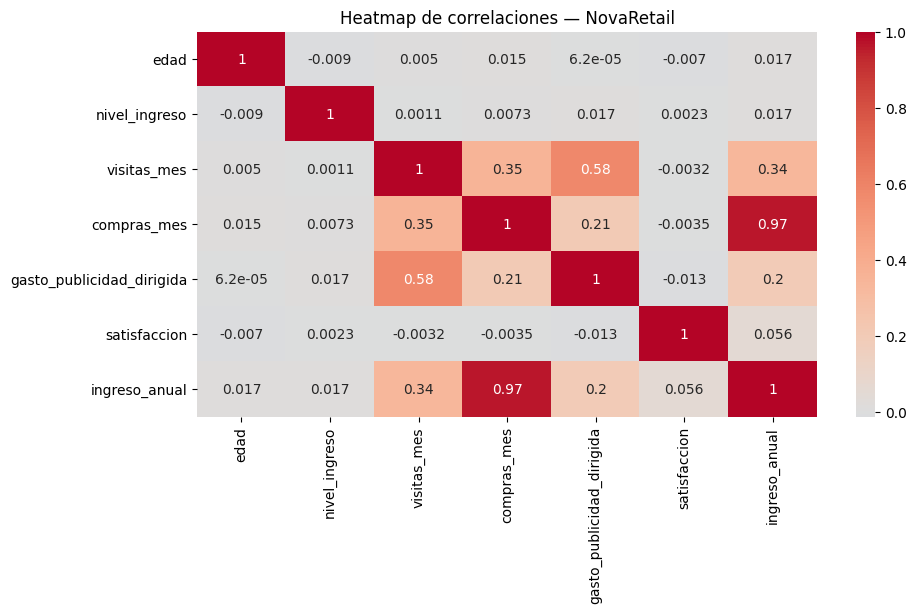

In [ ]:
# Visualizar la matriz de correlación para identificar relaciones
correlation_matrix = df[numeric_col].corr()

plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0) #recordando que 'annot' es para los valores en cada celda y 'cmap = ' es para la paleta de colores
plt.title("Heatmap de correlaciones — NovaRetail")
plt.show()

**Observaciones generales (Heatmap)**
- Se observa:
    - Correlaciones Muy Fuertes (>0.9):
    La correlación más notable es entre compras_mes e ingreso_anual (0.97), lo que indica una relación casi perfecta. Esto era predecible.
    - Correlaciones Moderadas (0.3-0.6):
        visitas_mes y compras_mes (0.35)
        visitas_mes y gasto_publicidad_dirigida (0.58)
        compras_mes y gasto_publicidad_dirigida (0.21)
            Esto sugiere que más visitas tienden a asociarse con más compras, y la publicidad dirigida guarda relación con ambas.
    - Variables Débilmente Correlacionadas:
Edad, nivel_ingreso, y satisfacción muestran correlaciones muy débiles (cercanas a 0) con casi todas las otras variables. Esto es relevante porque implica que:
    - La edad no es predictiva de comportamiento de compra
    - El nivel de ingresos categórico no se alinea bien con el comportamiento observado
    - La satisfacción es prácticamente independiente de otras métricas


Observaciones respecto a `ingreso_anual`  
- Presenta:
    - visitas_mes: 0.34 — Esta es la correlación más relevante. Indica que clientes con más visitas mensuales tienden a tener ingresos anuales ligeramente más altos.
    - gasto_publicidad_dirigida: 0.2 — Es una correlación débil, pero es la segunda más fuerte después de visitas_mes.
Lo interesante es ver cómo se relaciona con el comportamiento de compra:

visitas_mes: 0.58 — Correlación moderada. Más gasto en publicidad se podria asociar con más visitas
compras_mes: 0.21 — Correlación débil. Curiosamente, el impacto en compras es bajo
Interpretación
Este patrón sugiere que la publicidad dirigida es efectiva trayendo tráfico (visitas) pero no se traduce eficientemente en compras.

### Scatterplot general

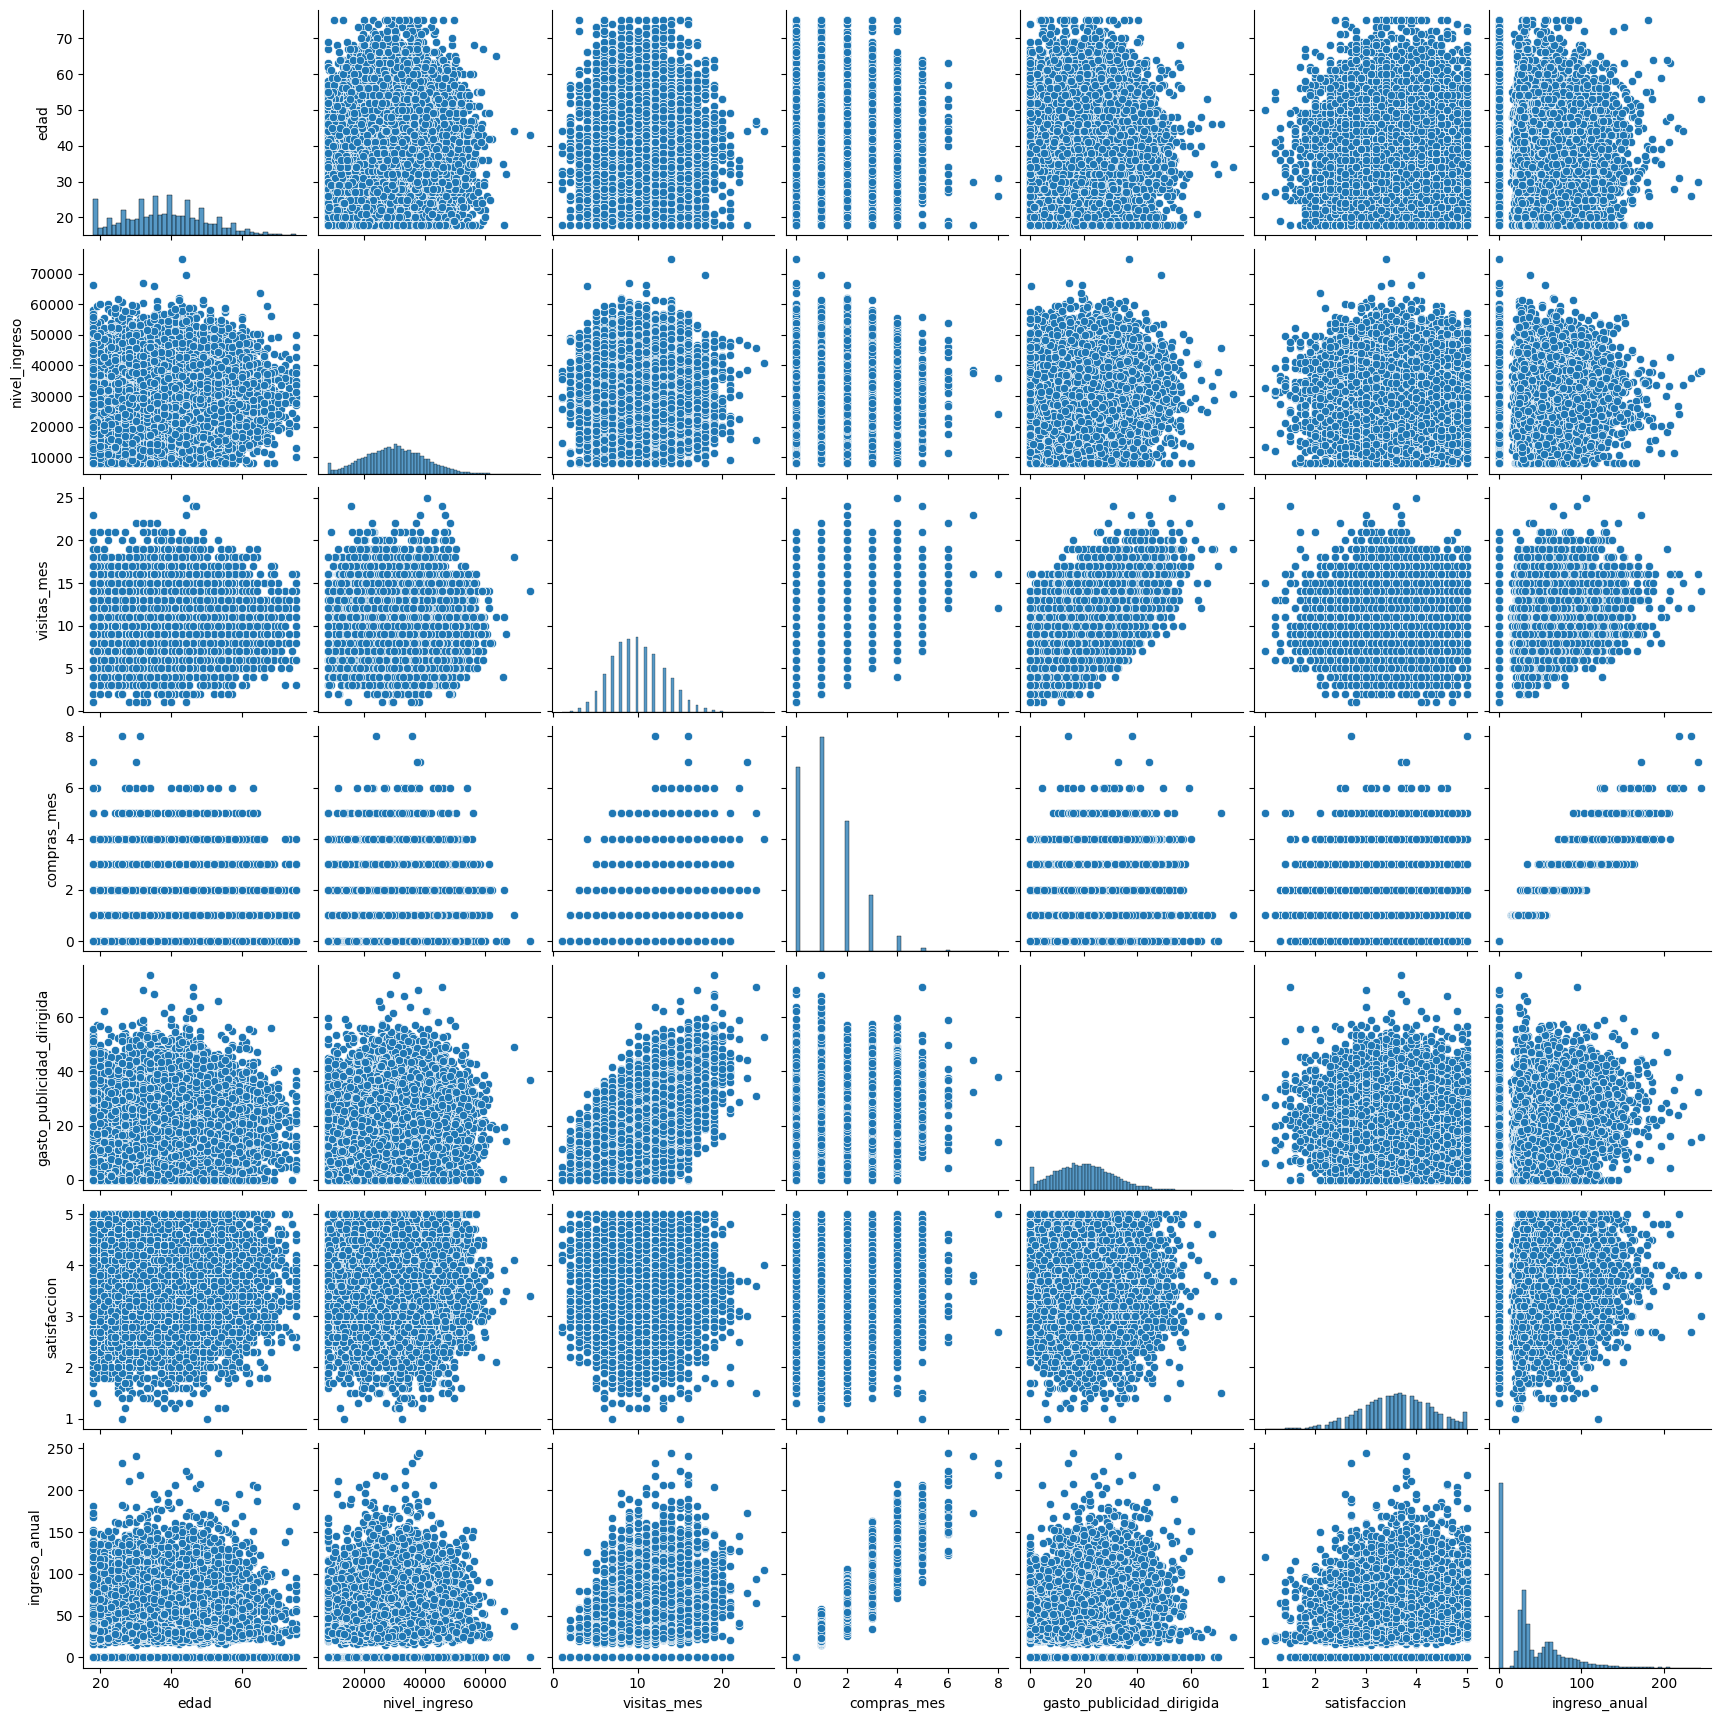

In [ ]:
#Generamos un scatterplot general de todas las variables numericas
sns.pairplot(df[numeric_col])
plt.show()

**Patrones y Tendencias Observadas**

**Variable más importante: compras_mes**
 - La columna y fila de compras_mes muestran patrones verticales muy marcados (líneas discretas), indicando que esta variable toma solo ciertos valores discretos. Su relación con ingreso_anual es prácticamente determinística (correlación 0.97), visible como una banda diagonal clara.

**Variables categóricas disfrazadas**
- satisfaccion y compras_mes muestran patrones de líneas horizontales y verticales, revelando que son variables discretas con valores repetidos.

**Dispersión sin patrón**
- edad, nivel_ingreso y gasto_publicidad_dirigida muestran nubes de puntos sin relaciones claras con otras variables. Esto confirma las correlaciones débiles del heatmap.

### Scatterplot para pares clave

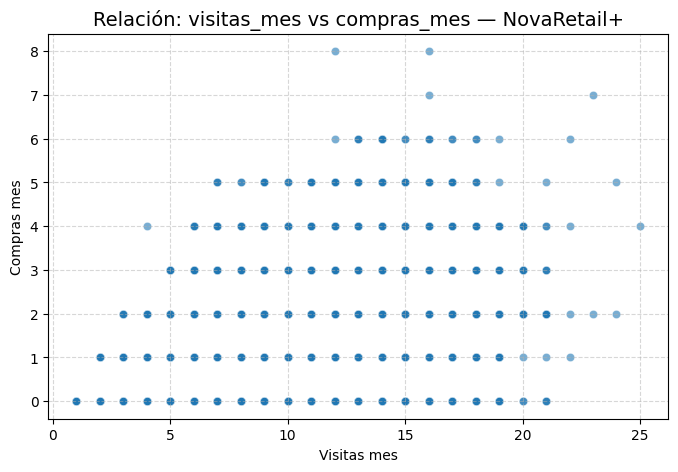

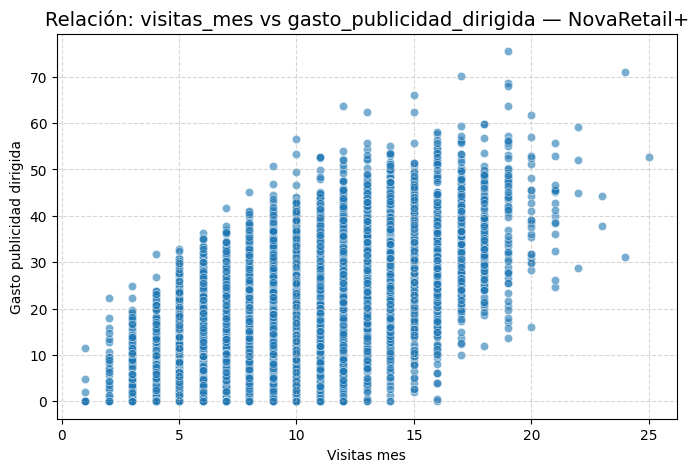

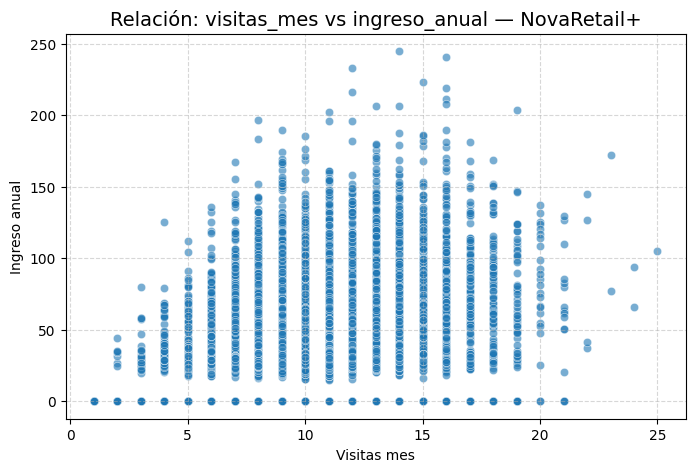

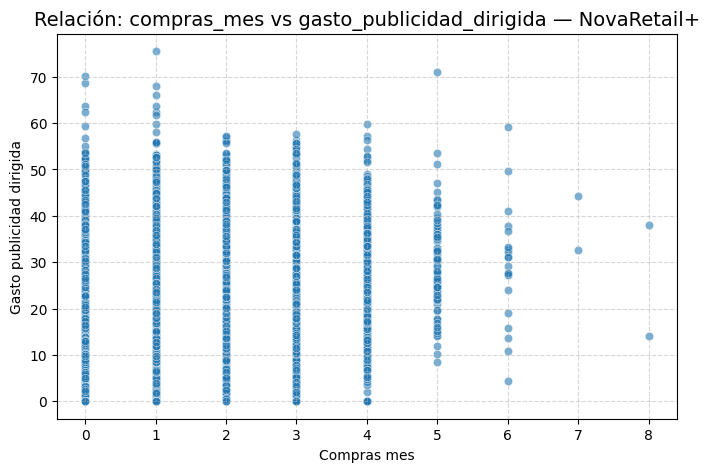

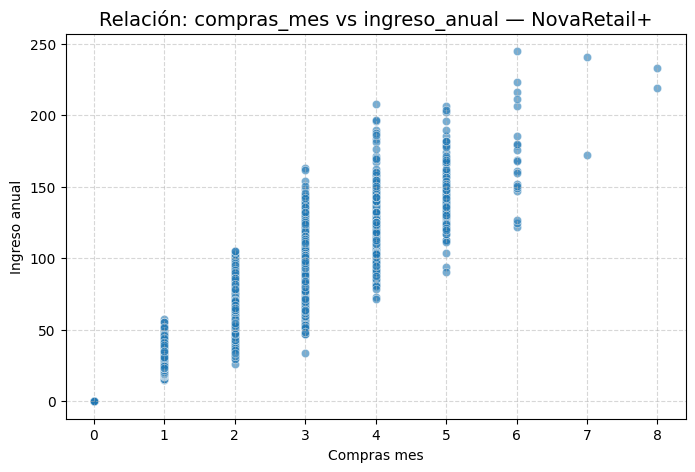

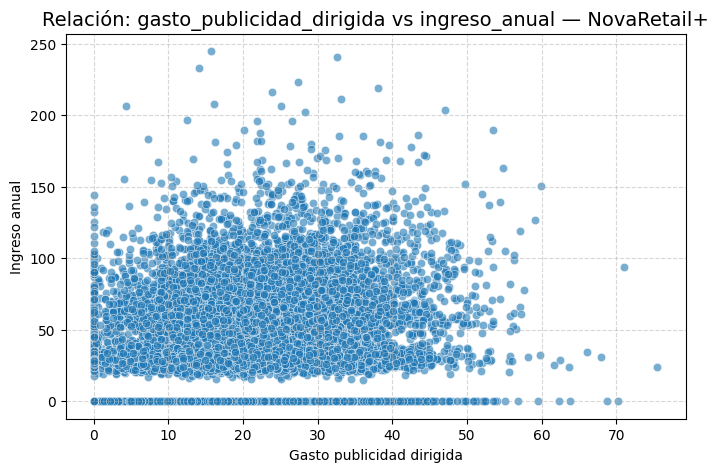

In [ ]:

# Visualizar pares de variables con relaciones moderadas o fuertes
# Definimos la lista de pares de variables a comparar
var_claves = [
    ("visitas_mes", "compras_mes"),
    ("visitas_mes", "gasto_publicidad_dirigida"),
    ("visitas_mes","ingreso_anual"),
    ("compras_mes", "gasto_publicidad_dirigida"),
    ("compras_mes", "ingreso_anual"),
    ("gasto_publicidad_dirigida","ingreso_anual"),
]

# Ciclo for para generar cada gráfico
for var_x, var_y in var_claves:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(
        data=df,
        x=var_x,
        y=var_y,
        alpha=0.6 # Añadimos transparencia para ver mejor la densidad de puntos
    )
    # Personalización dinámica de títulos y etiquetas
    plt.title(f"Relación: {var_x} vs {var_y} — NovaRetail+", fontsize=14)
    plt.xlabel(var_x.replace('_', ' ').capitalize())
    plt.ylabel(var_y.replace('_', ' ').capitalize())
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()


**Observaciones iniciales (Scatterplot)**

**Visitas_mes vs Compras_mes**
- Dirección: Positiva débil ➡️
- Dispersión: ALTA
- Los puntos están muy dispersos horizontalmente.
- Patrón Visual Distintivo: Los datos forman bandas horizontales (líneas discretas), reflejando que compras_mes es discreta. A mayor número de visitas, hay tendencia a mayor número de compras, pero la relación es débil y ruidosa.
- Colinealidad:BAJO RIESGO. Las variables son lo suficientemente independientes. Pueden usarse juntas en un modelo sin problemas de multicolinealidad.

**Visitas_mes vs Gasto_publicidad_dirigida**
- Dirección: Positiva moderada ➡️
- Dispersión: Media-Alta
Hay una nube de puntos diagonal visible, pero con considerable dispersión. Para un mismo gasto publicitario, el número de visitas varía bastante.
Colinealidad:RIESGO MODERADO. No hay multicolinealidad severa, pero existe relación significativa. Pueden usarse juntas, aunque hay redundancia moderada en la información que aportan.

**Visitas_mes vs Ingreso_anual**
- Dirección: Positiva Débil-Moderada ➡️
- La relación es débil y poco determinística, muy diferente a la correlación casi perfecta de compras_mes vs ingreso_anual.
- Dispersión: ALTA
- Colinealidad: BAJO RIESGO DE COLINEALIDAD

**Compras_mes vs Gasto_publicidad_dirigida**
- Dirección: Positiva muy débil ➡️
- Existe una tendencia, pero es casi imperceptible.
- Dispersión: MUY ALTA.
- Colinealidad:BAJO RIESGO. Las variables son prácticamente independientes.

**Compras_mes vs Ingreso_anual**
- Dirección: Positiva fuerte ➡️
- Los valores de ambas variables aumentan conjuntamente de forma consistente.
- Dispersión: Baja
- Los puntos siguen una pauta muy clara y predecible. Hay poca variabilidad alrededor de la línea de tendencia.
- Colinealidad:Esta correlación casi perfecta sugiere que compras_mes e ingreso_anual podrían ser prácticamente la misma variable o una derivada de la otra. En un modelo de predicción, usar ambas causaría multicolinealidad severa.

**Gasto_publicidad_dirigida vs Ingreso_anual**
- Dirección: Positiva Muy Débil ➡️
- Dispersión: EXTREMADAMENTE ALTA 🔴
- SÍ, hay outliers abundantes:
1. Outliers Superiores (Ingresos altos con poco gasto)
2. Outliers Inferiores (Bajo ingreso con alto gasto)
3. Cluster Masivo en la Base
Miles de puntos en la "línea de fondo" del gráfico
- Colinealidad: BAJO RIESGO DE COLINEALIDAD

## Sección 4 - Coeficientes de correlación y evidencia numérica

En esta sección, se reportan coeficientes que respaldan los patrones
observados visualmente, utilizando el método adecuado según el tipo
de variables.

### Pearson / Spearman

In [ ]:
# Calcular correlación entre variables relevantes
# Columnas a analizar
columnas_per_spe= ["visitas_mes","ingreso_anual","gasto_publicidad_dirigida","compras_mes"]

# Escribe aquí la función numeric_corr(df, columnas)
def numeric_corr(df, col):
    pearson_corr = df[col].corr(method = 'pearson')
    spearman_corr = df[col].corr(method = 'spearman')

    print("Correlación Pearson:")
    print(pearson_corr)
    print("\nCorrelación Spearman:")
    print(spearman_corr)

# Ejecutar función
numeric_corr(df,columnas_per_spe)

Correlación Pearson:
                           visitas_mes  ingreso_anual  \
visitas_mes                   1.000000       0.337147   
ingreso_anual                 0.337147       1.000000   
gasto_publicidad_dirigida     0.578947       0.197483   
compras_mes                   0.353844       0.967149   

                           gasto_publicidad_dirigida  compras_mes  
visitas_mes                                 0.578947     0.353844  
ingreso_anual                               0.197483     0.967149  
gasto_publicidad_dirigida                   1.000000     0.207528  
compras_mes                                 0.207528     1.000000  

Correlación Spearman:
                           visitas_mes  ingreso_anual  \
visitas_mes                   1.000000       0.320954   
ingreso_anual                 0.320954       1.000000   
gasto_publicidad_dirigida     0.559267       0.184999   
compras_mes                   0.332943       0.967482   

                           gasto_publicidad_

**Observaciones:**

**1.- COMPRAS_MES vs INGRESO_ANUAL**

**Correlaciones:**

Pearson: 0.9671

Spearman: 0.9675

Diferencia: 0.0003 - Prácticamente idéntica

Dirección: Positiva muy fuerte - Casi perfecta relación lineal.

Las dos correlaciones son casi idénticas, indicando que la relación es prácticamente perfecta y lineal. No hay componentes no-lineales significativos.

**2.-VISITAS_MES vs GASTO_PUBLICIDAD_DIRIGIDA**

**Correlaciones:**

Pearson: 0.5789

Spearman: 0.5593

Diferencia: 0.0197 - Diferencia pequeña

Dirección: Positiva moderada-fuerte - Relación principalmente lineal.

COLINEALIDAD - NIVEL MODERADO

**3.-VISITAS_MES vs INGRESO_ANUAL**

**Correlaciones:**

Pearson: 0.3371

Spearman: 0.3210

Diferencia: 0.0162 -  Muy consistente

Dirección: Positiva débil - Relación fundamentalmente lineal. Posible ligera curvatura (visitas altas generan menos retorno)

COLINEALIDAD - NIVEL BAJO

**4.-GASTO_PUBLICIDAD_DIRIGIDA vs INGRESO_ANUAL**

**Correlaciones:**

Pearson: 0.1975

Spearman: 0.1850

Diferencia: 0.0125 - Consistentes

Dirección: Positiva muy débil - Relación prácticamente nula.

COLINEALIDAD - NIVEL BAJO

### Punto-biserial

In [ ]:
# Calcular correlación entre variables relevantes
# Usamos "bin_cols" antes ya definida con las variables binarias
def p_biserial(df, col):
    pb,_ = pointbiserialr(df[col],df["ingreso_anual"])
    print(f"Correlación entre: {col} e ingreso_anual")
    print(f"Punto-biserial: {pb:.3f}")

# Ejecutar función
for col in bin_cols:
    p_biserial(df,col)

Correlación entre: miembro_premium e ingreso_anual
Punto-biserial: 0.093
Correlación entre: abandono e ingreso_anual
Punto-biserial: -0.003


**Observaciones Punto-biserial**

**1. miembro_premium e ingreso_anual**

    - Dirección: Positiva (0.093). Indica que los usuarios en el grupo "Premium" tienden a tener ingresos ligeramente superiores a los del grupo "No Premium".
    
    - Magnitud: Despreciable/Muy baja. Aunque la dirección es positiva, la fuerza de la asociación es casi inexistente.
    
    - Diagnóstico: No existe una diferencia de ingresos lo suficientemente marcada para distinguir a un miembro Premium de uno estándar. En términos prácticos, el nivel de ingresos no es una característica que defina la pertenencia al programa Premium en la base de datos actual.

**2. abandono e ingreso_anual**

    - Dirección: Negativa (-0.003). Sugiere que el grupo que abandonó tiene ingresos infinitesimalmente menores que el grupo que se quedó.
    
    - Magnitud: Nula. Un coeficiente de -0.003 es estadísticamente indistinguible de cero.
    
    - Diagnóstico: No hay diferencia en el nivel de ingresos entre los clientes que se van y los que se quedan. El fenómeno del abandono se distribuye de manera uniforme a través de todos los niveles de ingreso anual.

### V de Cramér

In [ ]:
# Función para calcular V de Cramér
cramer_cols = [
    ("region","tipo_dispositivo"),
    ("region","miembro_premium"),
    ("tipo_dispositivo","abandono")
]

def cramer_v(df, col1, col2):
    tabla = pd.crosstab(df[col1], df[col2])
    chi2 = chi2_contingency(tabla)[0] # Solo necesitamos el estadístico chi2
    n = tabla.values.sum()
    # Fórmula de V de Cramér
    v = np.sqrt(chi2 / (n * (min(tabla.shape) - 1)))
    return v

In [ ]:
# Aplicar V de Cramér en variables relevantes
print("=== ASOCIACIÓN CATEGÓRICA (V DE CRAMÉR) ===")
for col1, col2 in cramer_cols:
    coef = cramer_v(df, col1, col2)
    print(f"V de Cramér entre {col1:16} y {col2:16}: {coef:.4f}")

=== ASOCIACIÓN CATEGÓRICA (V DE CRAMÉR) ===
V de Cramér entre region           y tipo_dispositivo: 0.0124
V de Cramér entre region           y miembro_premium : 0.0126
V de Cramér entre tipo_dispositivo y abandono        : 0.0072


**Observaciones V de Cramér:**

**Análisis por Par de Variables:**

    - Región vs. Tipo de Dispositivo (0.0124): No existe un sesgo geográfico en el uso de tecnología.
    
    - Región vs. Miembro Premium (0.0126): El éxito de la suscripción Premium no depende de dónde viva el cliente.
    
    - Tipo de Dispositivo vs. Abandono (0.0072): Esta es la asociación más baja de todas. El hecho de que un cliente use móvil, tablet o escritorio no influye en absoluto en su decisión de abandonar la plataforma.

## Sección 5 - Interpretación de resultados para el negocio

### Hallazgo 1 —
**--Desconexión entre el Marketing y la Conversión Final**

**Evidencia visual:**
Scatterplots de la matriz 2x2 (específicamente visitas_mes vs gasto_publicidad_dirigida frente a compras_mes vs gasto_publicidad_dirigida).

**Evidencia numérica:**
Coeficiente de Pearson entre publicidad y visitas ($0.58$) frente a publicidad y compras ($0.21$).

**Interpretación**
Existe una asociación moderada que sugiere que la inversión publicitaria es efectiva para atraer tráfico al sitio, pero esta relación se debilita considerablemente al llegar al momento de la compra. La publicidad parece estar cumpliendo la función de "descubrimiento", pero no está logrando cerrar la venta con la misma intensidad.

**No podemos afirmar:**
Que aumentar el gasto en publicidad sea la causa directa de un aumento en las compras, ni que la publicidad sea ineficiente por sí misma; el problema podría estar en el proceso de pago o en la oferta del producto.

**Implicación de negocio**
Es probable que el "embudo de ventas" tenga una fuga en la etapa de conversión. Se recomienda revisar la experiencia de usuario (UX) en el carrito de compras antes de incrementar el presupuesto publicitario.

### Hallazgo 2 —
**--El Abandono es Independiente del Perfil Demográfico y Técnico--**

**Evidencia visual:**
El Heatmap general de correlaciones y la ausencia de patrones en las distribuciones categóricas.

**Evidencia numérica:**
V de Cramér entre tipo_dispositivo y abandono ($0.0072$) y Punto-biserial entre abandono e ingreso_anual ($-0.003$).

**Interpretación:**
La decisión de abandonar la plataforma no guarda relación con cuánto dinero gana el cliente ni con el dispositivo que utiliza para navegar. El fenómeno del "churn" ocurre de manera uniforme en todos los segmentos analizados.

**No podemos afirmar:**
Que el abandono sea inevitable; lo que sí podemos decir es que sus causas no son socioeconómicas ni técnicas (dispositivo), sino que probablemente se deban a factores no medidos en estas variables específicas.

**Implicación de negocio:**
Las estrategias de retención basadas en descuentos por nivel de ingreso o mejoras exclusivas para una sola plataforma (ej. solo para móvil) podrían ser ineficaces. Sugerimos investigar la calidad del servicio al cliente o la competitividad de precios como hipótesis de abandono.

### Hallazgo 3 —
**--La Anomalía de la Variable "Ingreso Anual"--**

**Evidencia visual:**
Scatterplot de compras_mes vs ingreso_anual (muestra una línea de tendencia casi perfecta).

**Evidencia numérica:**
Coeficiente de Pearson de $0.97$.

**Interpretación:**
La relación es tan extrema que sugiere que la variable ingreso_anual no representa el salario del cliente, sino que es un cálculo derivado directamente del volumen de compras (posiblemente el gasto total anualizado).

**No podemos afirmar:**
Que tener un mayor ingreso anual cause que los clientes compren más; en realidad, los datos apuntan a que son prácticamente la misma métrica expresada en diferentes escalas.

**Implicación de negocio:**
No se debe utilizar la columna ingreso_anual para segmentar por "poder adquisitivo" real, ya que se estaría incurriendo en una redundancia estadística. Se recomienda validar la procedencia de esta métrica con el equipo de ingeniería de datos para renombrarla correctamente como "Gasto Total".

## Sección 6 - Limitaciones y próximos pasos

### **Limitaciones**
- Correlación no implica causalidad: Los coeficientes hallados (Pearson, Punto-biserial, V de Cramér) identifican asociaciones matemáticas, pero no garantizan que una variable sea la causa directa de la otra.
- Variables no medidas: El análisis actual no incluye factores externos como precios de la competencia, problemas en la pasarela de pagos o calidad del servicio al cliente, los cuales suelen ser motores críticos de abandono.Redundancia de datos: La variable ingreso_anual presenta una colinealidad casi total con compras_mes ($0.97$), lo que limita su utilidad como predictor independiente del nivel socioeconómico.
- Sesgo de satisfacción: Con una media de 3.6, la métrica de satisfacción es centralizada; la falta de comentarios cualitativos impide entender qué separa a un detractor de un promotor.

### **Próximos pasos**
**[Paso 1]**
Análisis de Variables Derivadas: Implementar la variable alto_engagement para identificar si la combinación de alta navegación y compra se traduce en mayor rentabilidad o si son usuarios "caza-ofertas".

**[Paso 2]**
Segmentación por Satisfacción: Utilizar la variable cliente_satisfecho ($\ge 4$) para realizar un test de hipótesis contra la tasa de abandono. Si la relación es fuerte, el foco debe virar de marketing a servicio al cliente.

**[Paso 3]**
Investigación de Causas Comportamentales: Dado que el tipo_dispositivo y la region mostraron asociaciones nulas con el éxito del negocio, se recomienda realizar encuestas de salida (churn surveys) para capturar las razones del 15% de abandono.

**[Paso 4]**
Exploración de Nuevas V de Cramér: Cruzar miembro_premium con region para verificar si existen zonas geográficas con mayor disposición a pagar suscripciones, a pesar de que el ingreso general sea similar.

**[Paso 5]**
Experimento A/B de Conversión: Debido a la baja correlación entre publicidad y compras ($0.21$), realizar un experimento en el flujo de "Check-out" para usuarios móviles (65% de la base) para reducir la fricción en la compra final.